In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
df=spark.sql("select 'spark' as hello")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



First we have to make session SparkSession. It is an entry point to PySpark and creating a SparkSession instance 
would be the first statement you would write to program with RDD, DataFrame, and Dataset

In [3]:
spark

# Loading Dataset

In [2]:
#infer schema means that print int columns as int bxc without this parameter it will bydefault consider all columns as string

data=spark.read.csv("Practice.csv",header=True,inferSchema=True)

data.show()

+--------+----+------+
|    Name| Age|Weight|
+--------+----+------+
|Shamsher|  21|    66|
|   irfan|  22|    55|
| shapato|null|    77|
|   jalal|  20|    80|
+--------+----+------+



# checking data type of column

In [4]:
## Checking info in pyspark

data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Weight: integer (nullable = true)



# checking type of data

In [5]:
#check type of data

type(data)

pyspark.sql.dataframe.DataFrame

In [6]:
data.head(3)

[Row(Name='Shamsher', Age=21, Weight=66),
 Row(Name='irfan', Age=22, Weight=55),
 Row(Name='shapato', Age=None, Weight=77)]

# Print Specific Column

In [7]:
data.select("Name").show()

+--------+
|    Name|
+--------+
|Shamsher|
|   irfan|
| shapato|
|   jalal|
+--------+



In [8]:
data.select(["Name","Age"]).show()

+--------+----+
|    Name| Age|
+--------+----+
|Shamsher|  21|
|   irfan|  22|
| shapato|null|
|   jalal|  20|
+--------+----+



# Checking Dtypes

In [9]:
data.dtypes

[('Name', 'string'), ('Age', 'int'), ('Weight', 'int')]

In [10]:
data.describe().show()

+-------+--------+----+------------------+
|summary|    Name| Age|            Weight|
+-------+--------+----+------------------+
|  count|       4|   3|                 4|
|   mean|    null|21.0|              69.5|
| stddev|    null| 1.0|11.387127235025815|
|    min|Shamsher|  20|                55|
|    max| shapato|  22|                80|
+-------+--------+----+------------------+



# Adding columns

In [11]:
data=data.withColumn("New Age ",data["Age"]+3)

In [12]:
data.show()

+--------+----+------+--------+
|    Name| Age|Weight|New Age |
+--------+----+------+--------+
|Shamsher|  21|    66|      24|
|   irfan|  22|    55|      25|
| shapato|null|    77|    null|
|   jalal|  20|    80|      23|
+--------+----+------+--------+



To Add Column with constant Value

In [18]:
from pyspark.sql.functions import lit
data=data.withColumn("Country",lit("Pakistan"))
data.show()

+--------+----+------+--------+--------+
|    Name| Age|Weight|New Age | Country|
+--------+----+------+--------+--------+
|Shamsher|  21|    66|      24|Pakistan|
|   irfan|  22|    55|      25|Pakistan|
| shapato|null|    77|    null|Pakistan|
|   jalal|  20|    80|      23|Pakistan|
+--------+----+------+--------+--------+



# Drop a Column

In [61]:
data=data.drop("Name","Weight")

In [62]:
data.show()

+----+
| Age|
+----+
|  21|
|  22|
|null|
|  20|
+----+



# Rename Column

In [65]:
data.withColumnRenamed("Age","New Age").show()

data.toDf("New_name_1","New_name_2")

+-------+
|New Age|
+-------+
|     21|
|     22|
|   null|
|     20|
+-------+



# Counting Distinct Values in a column

In [39]:
from pyspark.sql.functions import countDistinct, avg, stddev,isnan

data.select(countDistinct("Name")).show()

+--------------------+
|count(DISTINCT Name)|
+--------------------+
|                   6|
+--------------------+



# Checking For  Null Values

In [3]:
data=spark.read.csv("Practice.csv",header=True,inferSchema=True)

data.show()

+--------+----+------+
|    Name| Age|Weight|
+--------+----+------+
|Shamsher|  21|    66|
|   irfan|  22|    55|
| shapato|null|    77|
|   jalal|  20|    80|
+--------+----+------+



In [9]:
from pyspark.sql.functions import isnan, when, count, col

data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+----+---+------+
|Name|Age|Weight|
+----+---+------+
|   0|  1|     0|
+----+---+------+



In [52]:
data.where(col("Age").isNull()).show()

+-------+----+------+
|   Name| Age|Weight|
+-------+----+------+
|shapato|null|    77|
+-------+----+------+



In [50]:
from pyspark.sql.functions import col
data.filter(col("Age").isNull()).count()

1

In [51]:
data.filter(data["Age"].isNull()).count()

1

# Dropping Null values

In [4]:
data=spark.read.csv("practice2.csv",header=True,inferSchema=True)

data.show()

+-----+----+
| Name| Age|
+-----+----+
| khan|  55|
|hamza|  12|
|kashi|null|
| null|   9|
|abbas|null|
| sher|  22|
+-----+----+



In [76]:
#  how="all"
#  how="any"
#  data=data.na.drop(how="any",thresh=2)
#  thresh =2 means that out of dataset atleast 2 columns should be non null
#  subset=['Age']  this will drop null sirf in the age column
data=data.na.drop()
data.show()

+------+---+
|  Name|Age|
+------+---+
|  khan| 55|
| hamza| 12|
|irfano|  9|
|  sher| 22|
+------+---+



# Filling Null Values

In [82]:
#Filling Null in whole data set with 2

data=data.na.fill(2)
data.show()

+------+---+
|  Name|Age|
+------+---+
|  khan| 55|
| hamza| 12|
| kashi|  2|
|irfano|  9|
| abbas|  2|
|  sher| 22|
+------+---+



In [110]:
# Filling null values in age column with 2

data=data.na.fill(2,["Age"])
data.show()

+------+---+
|  Name|Age|
+------+---+
|  khan| 55|
| hamza| 12|
| kashi|  2|
|irfano|  9|
| abbas|  2|
|  sher| 22|
+------+---+



In [14]:
data=spark.read.csv("practice2.csv",header=True,inferSchema=True)

data.show()

+-----+----+
| Name| Age|
+-----+----+
| khan|  55|
|hamza|  12|
|kashi|null|
| null|   9|
|abbas|null|
| sher|  22|
+-----+----+



# Replacing Null with Mean Numerical Columns

In [125]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['Age'], 
    outputCols=["{}_imputed".format(c) for c in ['Age']]
    ).setStrategy("mean")

In [126]:
# Add imputation cols to dataset

imputer.fit(data).transform(data).show()

+------+----+-----------+
|  Name| Age|Age_imputed|
+------+----+-----------+
|  khan|  55|         55|
| hamza|  12|         12|
| kashi|null|         24|
|irfano|   9|          9|
| abbas|null|         24|
|  sher|  22|         22|
+------+----+-----------+



# Replacing Null with Mean

In [19]:
from pyspark.sql.functions import mean
from pyspark.sql.functions import col

#Finding Mean value

data_mean = data.select(mean(col('Age')).alias('avg')).collect()
avg = data_mean[0]['avg']
avg

# Replacing Null with mean that is present in avg

data= data.fillna(value=avg, subset=['Age'])
data.show()


+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 24|
| null|  9|
|abbas| 24|
| sher| 22|
+-----+---+



# Filtering Data with some specific Conditions - Retrieving

In [157]:
data=spark.read.csv("practice3.csv",header=True,inferSchema=True)

data.show()

+------+---+------+
|  Name|Age|Salary|
+------+---+------+
|  khan| 55|  3000|
| hamza| 12|  4000|
| kashi| 12|  3300|
|irfano|  9|  5000|
| abbas| 33|  5200|
|  sher| 22|  3500|
+------+---+------+



# way to print whole filter columns

In [129]:
data.filter("Salary<=4000").show()

+-----+---+------+
| Name|Age|Salary|
+-----+---+------+
| khan| 55|  3000|
|hamza| 12|  4000|
|kashi| 12|  3300|
| sher| 22|  3500|
+-----+---+------+



# way to print Specific filter columns

In [131]:
data.filter("Salary<=4000").select(["Name","Age"]).show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 12|
| sher| 22|
+-----+---+



In [133]:
data.filter(data["Salary"]<=4000).select(["Name","Age"]).show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 12|
| sher| 22|
+-----+---+



# Putting two Conditions

In [138]:
data.filter((data["Salary"]<=4000) & (data["Age"]<55)).select(["Name","Age"]).show()

+-----+---+
| Name|Age|
+-----+---+
|hamza| 12|
|kashi| 12|
| sher| 22|
+-----+---+



# Groupby Function in Retrieving

In [145]:
data.groupBy(["Name"]).max().show()

+------+--------+-----------+
|  Name|max(Age)|max(Salary)|
+------+--------+-----------+
| abbas|      33|       5200|
|irfano|       9|       5000|
| kashi|      12|       3300|
| hamza|      12|       4000|
|  khan|      55|       3000|
|  sher|      22|       3500|
+------+--------+-----------+



In [148]:
data.groupBy(["Name"]).count().show()

+------+-----+
|  Name|count|
+------+-----+
| abbas|    1|
|irfano|    1|
| kashi|    1|
| hamza|    1|
|  khan|    1|
|  sher|    1|
+------+-----+



# Extracting Numerical Features

In [ ]:
numerical_cols = [c for c, t in data.dtypes if t !='string']
numerical_cols

# Extracting String Columns

In [ ]:
string_cols = [c for c, t in data.dtypes if t =='string']
string_cols

# Categorical to Numerical Conversion

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer=StringIndexer(inputCols=["sex","smoker","region"],outputCols=["gender_cat","smoker_cat","region_cat"])
indexed=indexer.fit(data).transform(data)


# Exploratory Data Analysis to check NULL ETC VISUALLY

In [2]:
data=spark.read.csv("practice2.csv",header=True,inferSchema=True)

data.show()

+-----+----+
| Name| Age|
+-----+----+
| khan|  55|
|hamza|  12|
|kashi|null|
| null|   9|
|abbas|null|
| sher|  22|
+-----+----+



# Checking Nulls in columns Visually

In [7]:

import matplotlib.pyplot as plt

In [22]:

null_value_list = list()

for i in data.columns:
    
    
    null_value_list.append(data.filter(data[i].isNull().count()))
    
plt.rcParams["figure.figsize"] = (40,9)
columns = [i for i in data.columns]
myexplode = [0.2, 0, 0, 0]

plt.pie(null_value_list, labels = columns, explode = myexplode, shadow = True, autopct='%1.0f%%')
plt.title('Total number of null value in column')
plt.show()
                       
                           

TypeError: 'Column' object is not callable

# To check Duplicate Rows

In [23]:
import pyspark.sql.functions as funcs
data.groupBy(data.columns).count().where(funcs.col('count') > 1).select(funcs.sum('count')).show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



# Separating Numerical and Categorical Columns

In [25]:
numeric_columns = list()
categorical_column = list()
for col_ in data.columns:
    if data.select(col_).dtypes[0][1] != "string":
        numeric_columns.append(col_)
    else:
        categorical_column.append(col_)
        
print("Numeric columns",numeric_columns)
print("categorical columns",categorical_column)

Numeric columns ['Age']
categorical columns ['Name']


# Data preprocessing’s

 - Checking Nulls in Columns

In [26]:
from pyspark.sql.functions import *
print(data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show())

+----+---+
|Name|Age|
+----+---+
|   1|  2|
+----+---+

None


- Dropping Nulls

In [28]:
dataframe = data.dropna()
dataframe.show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
| sher| 22|
+-----+---+



# - Handle missing value with imputation

-      For numeric column

- Mean imputation
- Median imputation
- Mode imputation



+ For categorical column

- Frequent category imputation

- Handle missing value with MEAN

In [51]:
from pyspark.ml.feature import Imputer

column_subset = [col_ for col_ in data.columns if data.select(col_).dtypes[0][1] !="string"]

imputer = Imputer(inputCols=column_subset, outputCols=[col_ for col_ in column_subset]).setStrategy("mean")

data = imputer.fit(data).transform(data)

data.show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 24|
| null|  9|
|abbas| 24|
| sher| 22|
+-----+---+



- Handle missing value with Median

In [33]:
from pyspark.ml.feature import Imputer

column_subset = [col_ for col_ in data.columns if data.select(col_).dtypes[0][1] !="string"]

imputer = Imputer(inputCols=column_subset, outputCols=[col_ for col_ in column_subset]).setStrategy("median")

data = imputer.fit(data).transform(data)

data.show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 12|
| null|  9|
|abbas| 12|
| sher| 22|
+-----+---+



- Handle missing value with Mode

In [36]:
column_subset = [col_ for col_ in data.columns if data.select(col_).dtypes[0][1] !="string"]
for col_ in column_subset:
    temp_col = data.groupBy(col_).count()
    temp_col = temp_col.dropna(subset=col_)
    mode = temp_col.orderBy(temp_col['count'].desc()).collect()[0]  [0]
    data= data.fillna(mode, subset=col_)
data.show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 12|
| null|  9|
|abbas| 12|
| sher| 22|
+-----+---+



- For categorical column    Frequent category imputation

In [52]:
column_subset = [col_ for col_ in data.columns if data.select(col_).dtypes[0][1] =="string"]

for col_ in column_subset:
    temp_col = data.groupBy(col_).count()
    temp_col = temp_col.dropna(subset=col_)
    frequent_category=temp_col.orderBy(temp_col['count'].desc()).collect()[0][0]
    
    data = data.fillna(frequent_category, subset=col_)
data.show()

+-----+---+
| Name|Age|
+-----+---+
| khan| 55|
|hamza| 12|
|kashi| 24|
|abbas|  9|
|abbas| 24|
| sher| 22|
+-----+---+



# Outlier Detection and Removal Using IQR

- Outlier Detection

In [45]:
for col_ in data.columns:
    if data.select(col_).dtypes[0][1]=="string":
        pass
    else:
        q1,q3 = data.approxQuantile(col_,[0.25, 0.75],0) 
        IQR = q3 - q1
        lower_bound = q1 - (1.5*IQR)
        upper_bound = q3 + (1.5*IQR)
        data= data.filter((data[col_]<lower_bound) |  (data[col_]>upper_bound))
data.show()

+----+---+
|Name|Age|
+----+---+
|khan| 55|
+----+---+



- Removing Outlier

In [54]:
for col_ in data.columns:
    if data.select(col_).dtypes[0][1]=="string":
        pass
    else:
        q1,q3 = data.approxQuantile(col_,[0.25, 0.75],0) 
        IQR = q3 - q1
        lower_bound = q1 - (1.5*IQR)
        upper_bound = q3 + (1.5*IQR)
        data = data.filter((data[col_]>lower_bound) & (data[col_]<upper_bound))
data.show()

+-----+---+
| Name|Age|
+-----+---+
|hamza| 12|
|kashi| 24|
|abbas|  9|
|abbas| 24|
| sher| 22|
+-----+---+



# Drop Duplicate Rows

In [3]:
data=data.dropDuplicates()
data.show()

+-----+----+
| Name| Age|
+-----+----+
|hamza|  12|
| sher|  22|
|abbas|null|
|kashi|null|
| khan|  55|
| null|   9|
+-----+----+



In [4]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(dataFrame)

# rescale each feature to range [min, max].
scaledData = scalerModel.transform(dataFrame)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaledData.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------+--------------+
|      features|scaledFeatures|
+--------------+--------------+
|[1.0,0.1,-1.0]|     (3,[],[])|
| [2.0,1.1,1.0]| [0.5,0.1,0.5]|
|[3.0,10.1,3.0]| [1.0,1.0,1.0]|
+--------------+--------------+



In [ ]:
scaledData.select("scaledFeatures").show(5, truncate=False)

# Code for checking Distribution

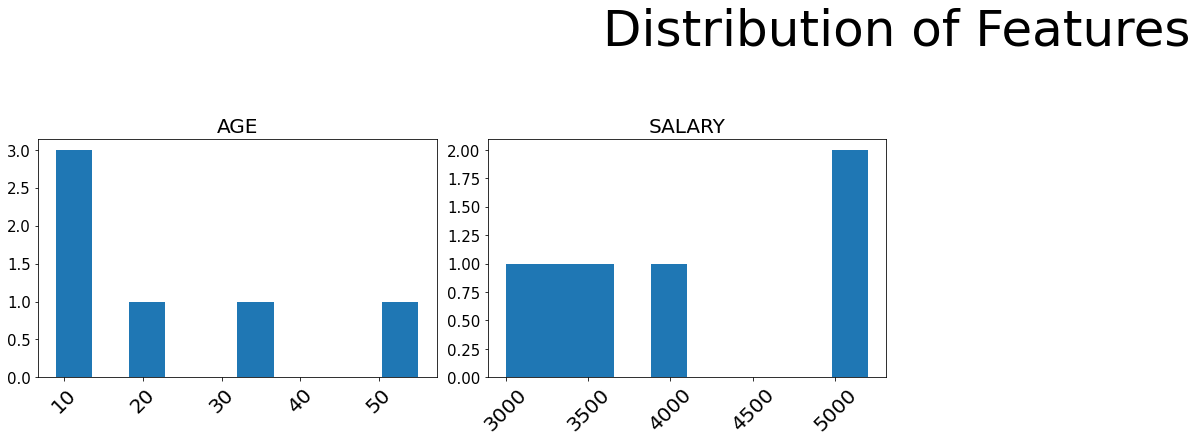

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(data.toPandas().describe().columns, range(1,11)):
  ax = fig.add_subplot(3,4, num)
  ax.hist(data.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()